In [2]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
kc_data = pd.read_csv("rocks.csv")

In [5]:
kc_data.shape

(45, 4)

In [6]:
kc_data.head()

,Brittleness,SieverJValue,DrillingRateIndex,Label
0,83.50,0.69,65,5
1,70.80,0.75,57,5
2,68.80,0.70,55,5
3,80.20,0.71,64,5
4,87.85,0.65,63,5


In [7]:
kc_data.describe()

,Brittleness,SieverJValue,DrillingRateIndex,Label
count,45.000000,45.000000,45.000000,45.000000
mean,61.897778,0.649778,45.533333,3.555556
std,14.430514,0.052936,13.913042,1.271283
min,31.500000,0.550000,18.000000,1.000000
25%,54.420000,0.610000,36.000000,3.000000
50%,64.400000,0.650000,46.000000,4.000000
75%,70.800000,0.690000,57.000000,4.000000
max,88.240000,0.750000,67.000000,5.000000


<function seaborn.utils.despine>

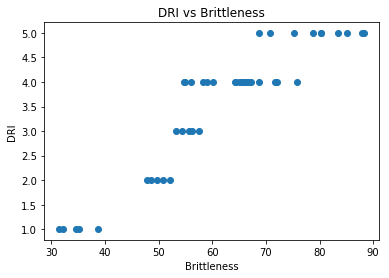

In [8]:
plt.scatter(kc_data.Brittleness, kc_data.Label)
plt.title('DRI vs Brittleness')
plt.xlabel('Brittleness')
plt.ylabel('DRI')
sns.despine

<function seaborn.utils.despine>

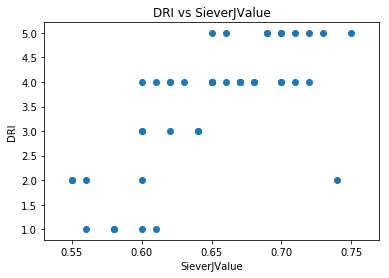

In [9]:
plt.scatter(kc_data.SieverJValue, kc_data.Label)
plt.title('DRI vs SieverJValue')
plt.xlabel('SieverJValue')
plt.ylabel('DRI')
sns.despine

<function seaborn.utils.despine>

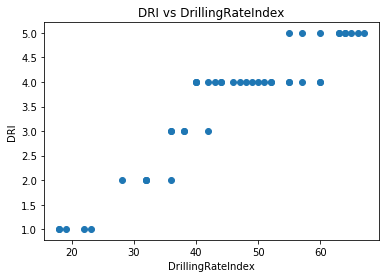

In [10]:
plt.scatter(kc_data.DrillingRateIndex, kc_data.Label)
plt.title('DRI vs DrillingRateIndex')
plt.xlabel('DrillingRateIndex')
plt.ylabel('DRI')
sns.despine

In [11]:
train1 = kc_data.drop(['Label'],axis=1)

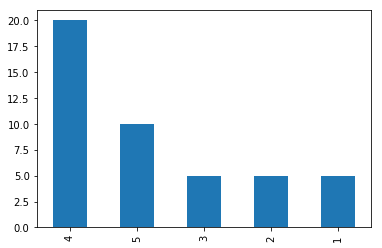

In [12]:
kc_data.Label.value_counts().plot(kind='bar')

## Employ Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
labels = kc_data['Label']
train1 = kc_data.drop(['Label'],axis=1)

In [16]:
from sklearn.cross_validation import train_test_split

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10, random_state = 2)

In [18]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
reg.score(x_test,y_test)

0.8178990070562497

## Accuracy for LInear Regression is 81.79%

## Applying Gradient Boosting Regression

In [20]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [21]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(**params)

In [22]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [23]:
clf.score(x_test,y_test)

0.8260061212983771

## This shows that we have a prediction accuracy of 82.69%

In [24]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [25]:
y_pred = reg.predict(x_test)

In [26]:
y_pred

array([2.52590556, 3.33551166, 2.49403525, 5.11531588, 2.69377082])

In [27]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [28]:
testsc = np.arange((params['n_estimators']))+1

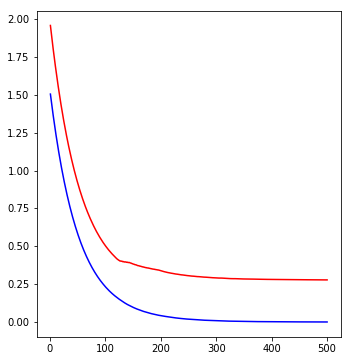

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [30]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA